Credits : https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html#

In [ ]:
!pip install librosa

### What is Sampling and Sampling frequency?

- In signal processing, **Sampling** is the reduction of a continuous signal   into a series of discrete values.
- The sampling frequency or rate is the number of samples taken over some fixed amount of time.
- A high sampling frequency results in **less information loss** but higher computational expense, 
- and low sampling frequencies have higher information loss but are fast and cheap to compute.


### What are the potential applications of audio processing? Here I would list a few of them:

- Indexing music collections according to their audio features.
- Recommending music for radio channels
- Similarity search for audio files (aka Shazam)
- Speech processing and synthesis — generating artificial voice for conversational agents

In [ ]:
import librosa
audio_data = '/content/Vocaroo iMPozIbzB8T.mp3'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


In [ ]:
print(x)

[-6.2426478e-03 -4.9178000e-03 -1.2294847e-03 ... -3.8787111e-05
 -3.2123695e-05 -1.3288871e-05]


In [ ]:
x.shape

(94316,)

In [ ]:
print(sr)

22050


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

In [ ]:
x1 , sr1 = librosa.load(audio_data , sr=44000)
print(x1,sr1)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[-6.2426478e-03 -6.0642171e-03 -4.9107857e-03 ... -1.5937992e-05
 -6.6150715e-06  0.0000000e+00] 44000


In [ ]:
x1.shape

(188205,)

In [ ]:
sr1

44000

In [ ]:
import numpy as np
from scipy.io.wavfile import write
write('test.wav', sr1, x1)

audio_data2 = 'test.wav'

import IPython.display as ipd
ipd.Audio(audio_data2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
x2 , sr2 = librosa.load(audio_data , sr=11000)
print(x2,sr2)

[-6.2337234e-03 -1.2325298e-03  7.9987344e-04 ... -2.6487509e-05
 -3.3978875e-05  0.0000000e+00] 11000


In [ ]:
x2.shape

(47052,)

In [ ]:
import numpy as np
from scipy.io.wavfile import write
write('test.wav', sr2, x2)

audio_data2 = 'test.wav'

import IPython.display as ipd
ipd.Audio(audio_data2)


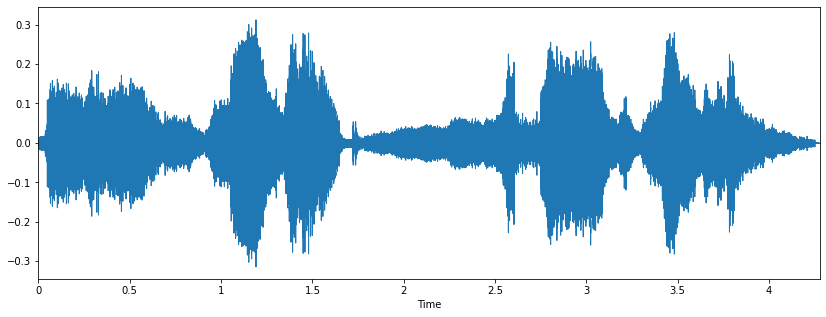

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr=sr2)

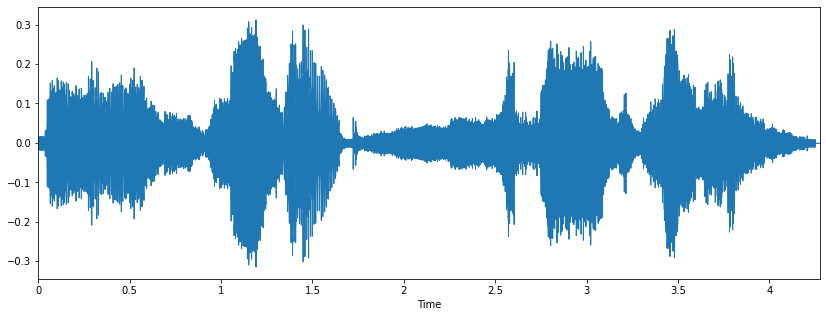

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x1, sr=sr1)

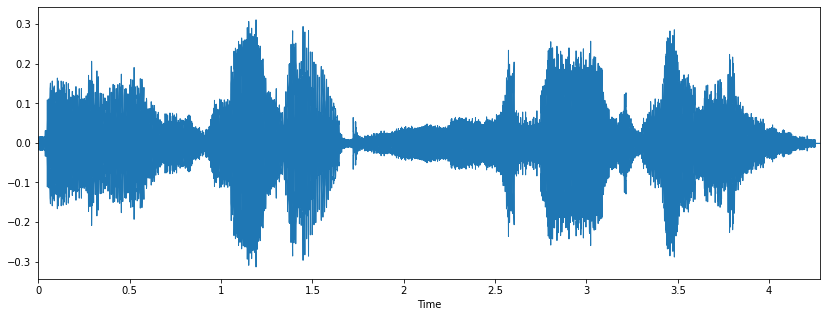

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

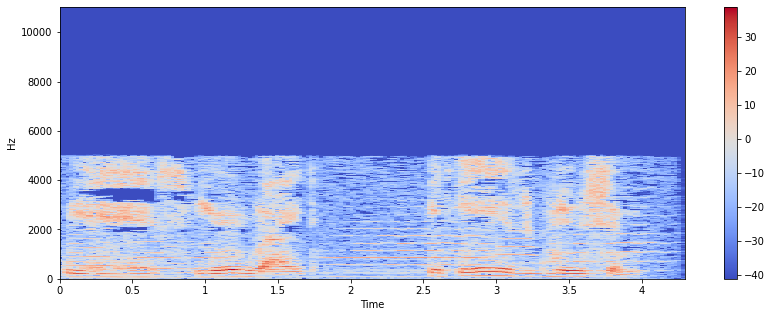

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

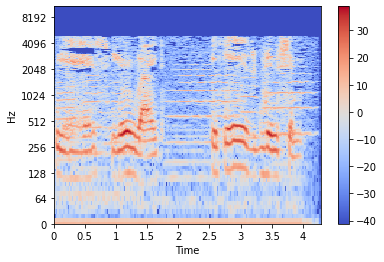

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
# librosa.output.write_wav('tone_220.wav', x, sr)

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

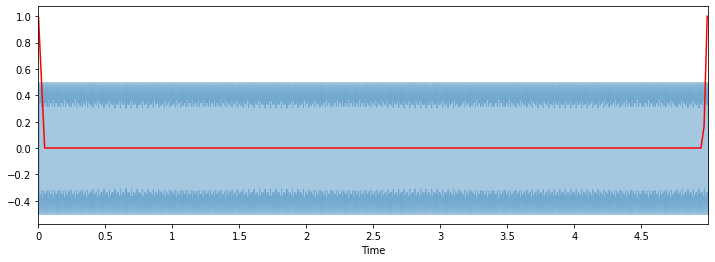

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

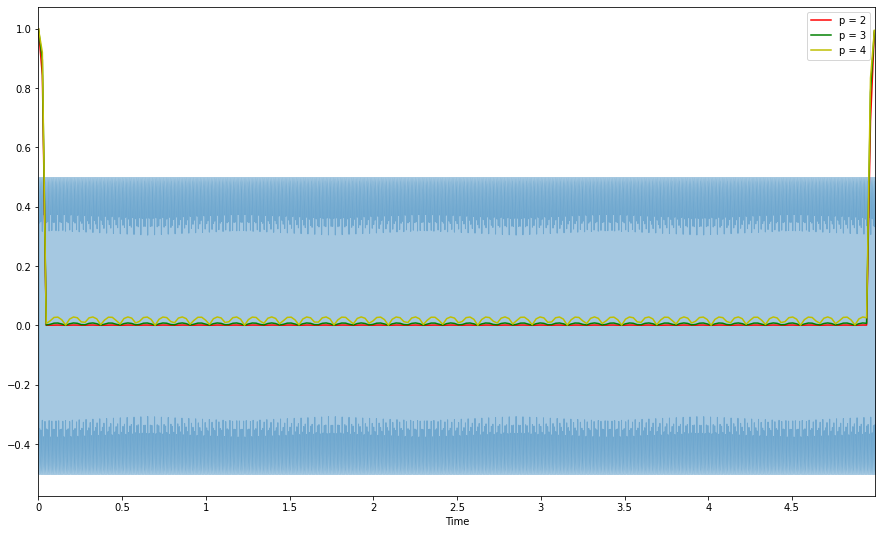

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

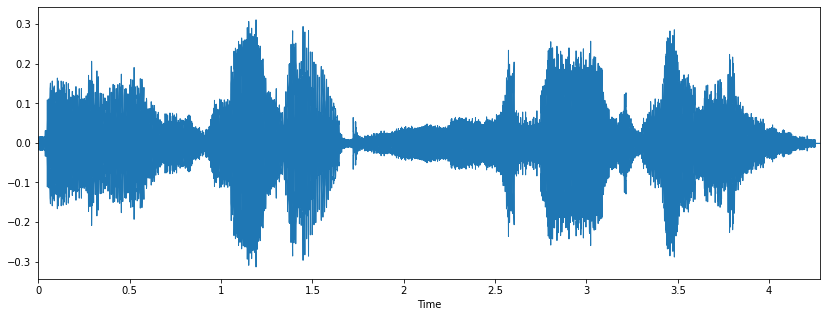

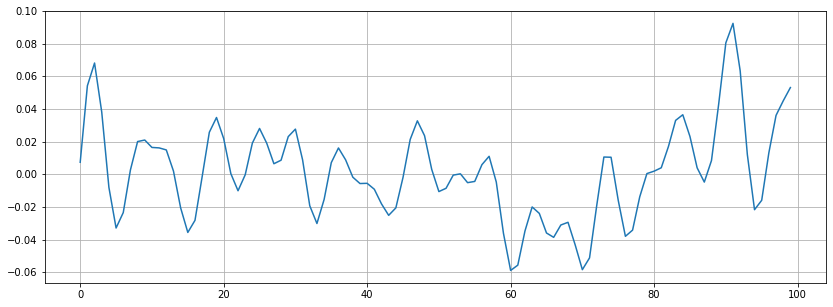

In [ ]:
x, sr = librosa.load('/content/Vocaroo iMPozIbzB8T.mp3')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()